In [1]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import imblearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/NN

/content/drive/MyDrive/NN


In [4]:
def upsample_label(temp_x, temp_y):
    y_time_list = temp_y['time'].values
    y_label = temp_y['label'].values
    jdx = 0
    label_list = []
    for index,row in temp_x.iterrows():
        try:
            if row['time'] > y_time_list[jdx]:
                jdx+=1
            label_list.append(y_label[jdx])
        except:
            label_list.append(y_label[jdx - 1])
    return label_list

In [5]:
filepath = 'TrainingData/'
column_list = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z','subject', 'time', 'label']
final_df = pd.DataFrame([], columns = column_list)
for i in glob.glob(filepath + '*.csv'):
    df_type = i.split('.')[0].split('__')[1]
    file_name = i.split('/')[1].split('__')[0]
    if df_type == 'x':
        x = open(filepath + file_name + '__x.csv')
        x = pd.read_csv(x)
        x['subject'] = [file_name] * x.shape[0]
        
        x_time = open(filepath + file_name + '__x_time.csv')
        x_time = pd.read_csv(x_time)
        x['time'] = x_time
        
        y = open(filepath + file_name + '__y.csv')
        y = pd.read_csv(y)
        y['subject'] = [file_name] * y.shape[0]
        
        y_time = open(filepath + file_name + '__y_time.csv')
        y_time = pd.read_csv(y_time)
        y['time'] = y_time
        
        y.columns = ['label', 'subject', 'time']
        label_list = upsample_label(x, y)
        x['label'] = label_list
        x.columns = column_list
        final_df = pd.concat([final_df, x], ignore_index=True)


In [6]:
final_df.shape

(1341617, 9)

In [7]:
final_df.head(20)

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,subject,time,label
0,4.186920,8.344455,2.908057,0.005771,-0.004480,-0.003345,subject_001_01,0.025,0
1,4.544637,8.408659,2.890000,0.007967,0.022412,0.001159,subject_001_01,0.050,0
2,4.849308,8.411614,2.900692,0.027778,-0.010670,-0.014223,subject_001_01,0.075,0
3,4.509190,8.118649,2.847298,0.021577,-0.045498,-0.021111,subject_001_01,0.100,0
4,4.226515,8.273807,2.851742,0.012534,0.000445,-0.016830,subject_001_01,0.125,0
5,4.532063,8.398341,2.856682,0.014484,0.028769,-0.011091,subject_001_01,0.150,0
6,4.433669,8.294719,2.823521,0.016340,-0.029434,-0.008998,subject_001_01,0.175,0
7,4.160676,8.260676,2.827568,0.011222,-0.016748,-0.006027,subject_001_01,0.200,0
8,4.432763,8.272613,2.790050,-0.002715,0.023094,0.012222,subject_001_01,0.225,0
9,4.511362,8.256774,2.820538,-0.002248,0.001547,0.011137,subject_001_01,0.250,0


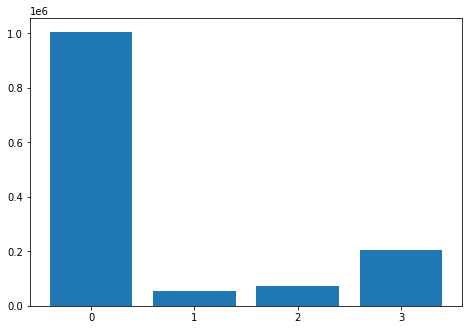

In [8]:
x_label = ['0', '1', '2', '3']
y_label = []
for i in range(4):
    y_label.append(final_df['label'].value_counts()[i])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x_label, y_label)
plt.show()

In [9]:
print(final_df['label'].value_counts())

0    1006897
3     206436
2      73068
1      55216
Name: label, dtype: int64


In [10]:
class_0 = (1/(final_df['label'].value_counts()[0]/final_df.shape[0])).round(3)
class_1 = (1/(final_df['label'].value_counts()[1]/final_df.shape[0])).round(3)
class_2 = (1/(final_df['label'].value_counts()[2]/final_df.shape[0])).round(3)
class_3 = (1/(final_df['label'].value_counts()[3]/final_df.shape[0])).round(3)

print(class_0, class_1, class_2, class_3)

1.332 24.298 18.361 6.499


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(final_df['label'])
X = final_df[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# random forest with class weight on an imbalanced classification dataset
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

weights = {0:class_0, 1:class_1, 2:class_2, 3:class_3}
model = RandomForestClassifier(n_estimators=10, class_weight=weights)

model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print('Test Accuracy : %.3f'%(y_preds == y_test).mean())
print('Test Accuracy : %.3f'%model.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training Accuracy : %.3f'%model.score(X_train, y_train))


Test Accuracy : 0.787
Test Accuracy : 0.787
Training Accuracy : 0.980


In [15]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_preds))

array([[290758,   1840,   2746,   6808],
       [ 10981,   4544,    454,    698],
       [  8879,    284,  12241,    302],
       [ 51588,    747,    581,   9035]])

In [17]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88    302152
           1       0.61      0.27      0.38     16677
           2       0.76      0.56      0.65     21706
           3       0.54      0.15      0.23     61951

    accuracy                           0.79    402486
   macro avg       0.68      0.49      0.53    402486
weighted avg       0.75      0.79      0.74    402486

